# DSCI 503 - Homework 07
### Bernard Mwamburi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Problem 1: NYC Restaurant Dataset

In [2]:
nyc = pd.read_csv('nyc.txt', sep='\t')
nyc.head(10)

,Price,Food,Decor,Service,Wait,East
0,43,22,18,20,36,0
1,32,20,19,19,22,0
2,34,21,13,18,20,0
3,41,20,20,17,25,0
4,54,24,19,21,32,0
5,52,22,22,21,15,0
6,34,22,16,21,25,0
7,34,20,18,21,21,1
8,39,22,19,22,23,1
9,44,21,17,19,27,1


In [3]:
X1 = nyc.iloc[:, 1:].values
y1 = nyc.iloc[:, 0].values
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.20, random_state=1)
print(f'''
Training Features Shape: {X_train_1.shape}
Testing Features Shape:  {X_test_1.shape}
''')


Training Features Shape: (134, 5)
Testing Features Shape:  (34, 5)



In [4]:
nyc_mod = LinearRegression()
nyc_mod.fit(X_train_1, y_train_1)
print(f'''
Intercept:    {nyc_mod.intercept_}
Coefficients: {nyc_mod.coef_}
''')


Intercept:    -23.755435322488893
Coefficients: [ 1.55693926  2.00700907 -0.25440527  0.09203064  2.63235537]



In [5]:
print(f'''
Training r-Squared: {np.round(nyc_mod.score(X_train_1, y_train_1), 4)}
Testing r-Squared:  {np.round(nyc_mod.score(X_test_1, y_test_1), 4)}
''')


Training r-Squared: 0.6306
Testing r-Squared:  0.6245



In [6]:
test_pred_1 = nyc_mod.predict(X_test_1)
print(f'''
Observed Prices:  {y_test_1[:10]}
Estimated Prices: {np.round(test_pred_1[:10], 2)}
''')


Observed Prices:  [33 45 54 38 22 47 38 51 46 47]
Estimated Prices: [39.2  38.09 49.35 39.26 19.72 47.4  36.85 50.07 48.26 43.01]



In [7]:
# make into a dataframe
nyc_new = pd.DataFrame({
    'Food': [22, 18, 25],
    'Decor': [12, 19, 22],
    'Service': [20, 22, 18],
    'Wait': [15, 34, 36],
    'East': [0, 1, 0]
})
nyc_new
new_pred_1 = nyc_mod.predict(nyc_new.iloc[:,:].values)
print(f'Estimated Prices: {np.round(new_pred_1, 2)}')

Estimated Prices: [30.87 42.57 58.06]


## Problem 2: Diamonds Dataset

In [8]:
diamonds = pd.read_csv('diamonds.txt', sep='\t')
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
diamonds.loc[:, 'ln_carat'] = np.log(diamonds.loc[:, 'carat'])
diamonds.loc[:, 'ln_price'] = np.log(diamonds.loc[:, 'price'])
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,ln_carat,ln_price
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.469676,5.786897
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,5.789960
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131


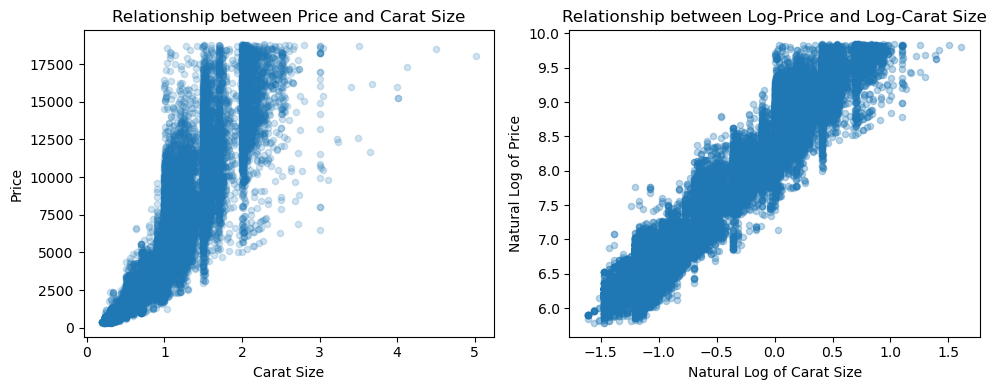

In [10]:
plt.figure(figsize=[10, 4])
plt.subplot(1, 2, 1)
plt.scatter(diamonds.carat, diamonds.price, s=20, alpha=0.2)
plt.title("Relationship between Price and Carat Size")
plt.xlabel('Carat Size')
plt.ylabel('Price')
plt.subplot(1, 2, 2)
plt.scatter(diamonds.ln_carat, diamonds.ln_price, s=20, alpha=0.3)
plt.title("Relationship between Log-Price and Log-Carat Size")
plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Natural Log of Price')

plt.tight_layout()
plt.show()

In [11]:
X2 = diamonds.iloc[:, -2].values.reshape(-1, 1)
y2 = diamonds.iloc[:, -1].values
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.10, random_state=1)
print(f'''
Training Features Shape: {X_train_2.shape}
Test Features Shape:     {X_test_2.shape}
''')


Training Features Shape: (48546, 1)
Test Features Shape:     (5394, 1)



In [12]:
dia_mond = LinearRegression()
dia_mond.fit(X_train_2, y_train_2)
print(f'''
Intercept:    {dia_mond.intercept_}
Coefficients: {dia_mond.coef_}
''')


Intercept:    8.448298621179152
Coefficients: [1.67493107]



In [13]:
print(f'''
Training r-Squared: {np.round(dia_mond.score(X_train_2, y_train_2), 4)}
Testing r-Squared:  {np.round(dia_mond.score(X_test_2, y_test_2), 4)}
''')


Training r-Squared: 0.933
Testing r-Squared:  0.9328



In [14]:
test_pred_2 = dia_mond.predict(X_test_2)
print(f'''
Observed Prices:  {np.exp(y_test_2)}
Estimated Prices: {np.round(np.exp(test_pred_2))}
''')


Observed Prices:  [ 564. 5914. 2562. ... 5599.  984. 3936.]
Estimated Prices: [ 729. 6334. 2096. ... 4746. 1511. 3985.]



In [15]:
diamonds_new = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0]).reshape(-1, 1)
new_pred_2 = dia_mond.predict(diamonds_new)
print(f'Estimated Prices: {np.round(np.exp(new_pred_2))}')

Estimated Prices: [ 10783.  24915.  57566. 133007. 307314. 710051.]


## Problem 3: Heart Disease Dataset

In [16]:
hd = pd.read_csv('heart_disease.txt', sep='\t')
hd.head(10)

,age,sex,chest_pain_type,resting_bp,serum_chol,fasting_blood_sugar,electrocardio,max_heart_rate,exercise_induced_angina,oldpeak,slope,major_vessels,thal,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,1
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,2
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,2
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,2
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,2


In [17]:
X3 = hd.iloc[:, :13].values
y3 = hd.iloc[:, 13].values
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y3, test_size=0.20, random_state=1, stratify=y3)
print(f'''
Training Features Shape: {X_train_3.shape}
Test Features Shape:     {X_test_3.shape}
''')


Training Features Shape: (216, 13)
Test Features Shape:     (54, 13)



In [18]:
hd_mod = LogisticRegression(solver='lbfgs', penalty='none', max_iter=1000)
hd_mod.fit(X_train_3, y_train_3)
print(f'''
Intercept: {hd_mod.intercept_}
Coefficients:
{hd_mod.coef_}
''')


Intercept: [-9.94634361]
Coefficients:
[[-0.03329814  1.82098836  0.75408928  0.0252701   0.01446417 -0.70665563
   0.32452456 -0.01940026  0.74379951  0.36516067  0.28880262  1.07674293
   0.38279556]]



C:\Users\MRT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [19]:
print(f'''
Training Accuracy: {np.round(hd_mod.score(X_train_3, y_train_3), 4)}
Testing Accuracy: {np.round(hd_mod.score(X_test_3, y_test_3), 4)}
''')


Training Accuracy: 0.8472
Testing Accuracy: 0.8148



In [20]:
test_pred_3 = hd_mod.predict(X_test_3)
print(f'''
Observerd Labels: {y_test_3[:20]}
Predicted Labels: {test_pred_3[:20]}
''')


Observerd Labels: [2 2 2 1 1 2 1 1 2 1 2 1 1 1 2 1 1 1 2 1]
Predicted Labels: [2 2 2 1 1 2 1 1 2 1 2 1 1 1 2 1 1 1 2 1]



In [21]:
prob_log_reg = hd_mod.predict_proba(X_test_3)
df = pd.DataFrame(prob_log_reg, columns=['1', '2'])
df.head(10)

,1,2
0,0.011473,0.988527
1,0.043225,0.956775
2,0.039977,0.960023
3,0.847724,0.152276
4,0.873859,0.126141
5,0.051603,0.948397
6,0.919977,0.080023
7,0.945291,0.054709
8,0.009894,0.990106
9,0.996806,0.003194


## Problem 4: Gapminder Dataset

In [22]:
gm = pd.read_csv('gapminder_data.txt', sep='\t')
gm18 = gm.loc[gm.loc[:, 'year'] == 2018]
gm18.head(10)

,country,year,continent,population,life_exp,gdp_per_cap,gini
40112,Afghanistan,2018,asia,36400000,58.7,1870,36.8
40113,Albania,2018,europe,2930000,78.0,12400,29.0
40114,Algeria,2018,africa,42000000,77.9,13700,27.6
40115,Angola,2018,africa,30800000,65.2,5850,42.6
40116,Antigua and Barbuda,2018,americas,103000,77.6,21000,40.0
40117,Argentina,2018,americas,44700000,77.0,18900,42.4
40118,Armenia,2018,europe,2930000,76.0,8660,32.6
40119,Australia,2018,asia,24800000,82.9,45800,32.3
40120,Austria,2018,europe,8750000,81.8,44600,30.5
40121,Azerbaijan,2018,europe,9920000,72.3,16600,32.4


In [23]:
X4 = gm18.iloc[:, 4:].values
y4 = gm18.iloc[:, 2].values
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X4, y4, test_size=0.30, random_state=1, stratify=y4)
print(f'''
Training Features Shape: {X_train_4.shape}
Test Features Shape:     {X_test_4.shape}
''')


Training Features Shape: (128, 3)
Test Features Shape:     (56, 3)



In [24]:
gm_mod = LogisticRegression(solver='lbfgs', penalty='none', multi_class='multinomial', max_iter=1000)
gm_mod.fit(X_train_4, y_train_4)
print(f'''
Intercept: {gm_mod.intercept_}
Coefficients:
{gm_mod.coef_}
''')


Intercept: [ 0.00205871 -0.00474209  0.00332997 -0.00064659]
Coefficients:
[[-8.83465829e-02 -1.02841848e-04  2.01022496e-01]
 [-8.62514238e-02  3.30203846e-05  1.59853180e-01]
 [ 1.93529606e-02  2.94684586e-05 -2.33262809e-02]
 [ 1.55245046e-01  4.03530052e-05 -3.37549395e-01]]



C:\Users\MRT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [25]:
print(f'''
Training Accuracy: {np.round(gm_mod.score(X_train_4, y_train_4), 4)}
Testing Accuracy:  {np.round(gm_mod.score(X_test_4, y_test_4), 4)}
''')


Training Accuracy: 0.625
Testing Accuracy:  0.5893



In [26]:
test_prep_4 = gm_mod.predict(X_test_4)
print(f'''
Observed Labels: {y_test_4[:8]}
Predicted Labels: {test_prep_4[:8]}
''')


Observed Labels: ['americas' 'asia' 'asia' 'asia' 'africa' 'europe' 'asia' 'europe']
Predicted Labels: ['asia' 'europe' 'africa' 'asia' 'europe' 'europe' 'africa' 'europe']



In [27]:
prob_gm18 = gm_mod.predict_proba(X_test_4)
gm18_proba = pd.DataFrame(prob_gm18, columns=['africa', 'americas', 'asia', 'europe'])
gm18_proba.head(10)

,africa,americas,asia,europe
0,0.066472,0.259539,0.578309,0.095680
1,0.001112,0.043619,0.358324,0.596944
2,0.662741,0.210946,0.122855,0.003459
3,0.227131,0.262118,0.456416,0.054335
4,0.002035,0.004913,0.112402,0.880650
5,0.001853,0.023854,0.252441,0.721853
6,0.630230,0.219104,0.146757,0.003909
7,0.000027,0.000734,0.033159,0.966080
8,0.001242,0.010832,0.163475,0.824451
9,0.178418,0.118023,0.492364,0.211194


In [28]:
gm_new = pd.DataFrame({
    'life_exp' : [75, 75, 75, 75, 75, 75],
    'gdp_per_cap' : [5000, 5000, 5000, 20000, 20000, 20000],
    'gini' : [30, 40, 50, 30, 40, 50],
})
prob_gm_new = np.round(gm_mod.predict_proba(gm_new.values), 3)
gm18_new = pd.DataFrame(prob_gm_new, columns=['africa', 'americas', 'asia', 'europe'])
gm18_new

,africa,americas,asia,europe
0,0.038,0.026,0.287,0.649
1,0.433,0.191,0.343,0.033
2,0.726,0.213,0.061,0.000
3,0.005,0.025,0.265,0.705
4,0.092,0.314,0.533,0.061
5,0.259,0.582,0.158,0.001


According to our model:
* Country 0 is most likely in europe.
* Country 1 is most likely in africa.
* Country 2 is most likely in africa.
* Country 3 is most likely in europe.
* Country 4 is most likely in asia.
* Country 5 is most likely in americas.